# Cleaning Star Wars Survey Data

## Cleaning data
### Drop null values for respondentID

In [20]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Map the Yes/No columns to Boolean using .map

In [21]:
# Define dictionary to map the values
yes_no = {'Yes': True, 'No':False}
for cols in ['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?']:
    star_wars[cols]=star_wars[cols].map(yes_no)

### Map the Checkbox columns to Boolean using .map and .rename

In [22]:
import numpy as np

# Map the movie checkbox columns into boolean
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False,
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [23]:
# Rename the columns
column_mapping = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}

for col in star_wars.columns[3:9]:
    star_wars = star_wars.rename(columns=column_mapping)

In [24]:
# Convert the next 6 ranking columns to type float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename the columns so they make more sense
# Rename the columns
column_mapping = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': "ranking_1",
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}

for col in star_wars.columns[9:15]:
    star_wars = star_wars.rename(columns=column_mapping)

## Visualizing data
### Visualize the ranking for movies

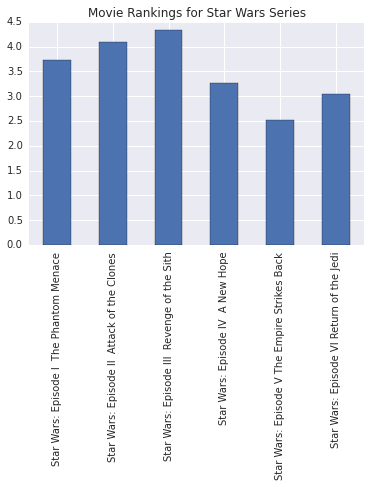

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

movie_name = [
    "Star Wars: Episode I  The Phantom Menace",
    "Star Wars: Episode II  Attack of the Clones",
    "Star Wars: Episode III  Revenge of the Sith",
    "Star Wars: Episode IV  A New Hope",
    "Star Wars: Episode V The Empire Strikes Back",
    "Star Wars: Episode VI Return of the Jedi" 
]

# accumulate the mean of the movie rankings
mean_ranking=[]
for col in star_wars.columns[9:15]:
    mean_ranking.append(star_wars[col].mean())
    
# cast the mean ranking into a dataframe with the movie names as index
movie_mean = pd.DataFrame(mean_ranking, index=movie_name)

# plot using pandas plot
movie_mean.plot(kind='bar', legend=False, title='Movie Rankings for Star Wars Series')
sns.plt.show()

### Visualize the most seen movie

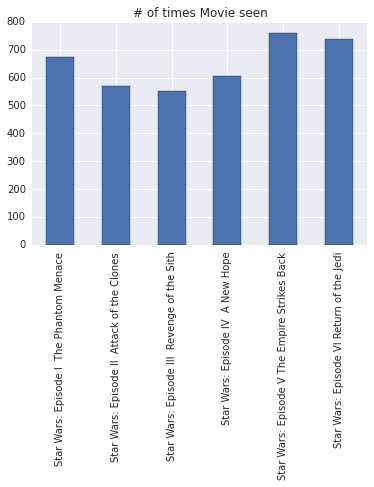

In [26]:
# Accumulate the number of times movie has been seen
count_seen = []
for col in star_wars.columns[3:9]:
    count_seen.append(star_wars[col].sum())
# Cast into dataframe
movie_seen = pd.DataFrame(count_seen, index=movie_name)
movie_seen.plot(kind='bar', legend=False, title='# of times Movie seen')

## Binary segmenting

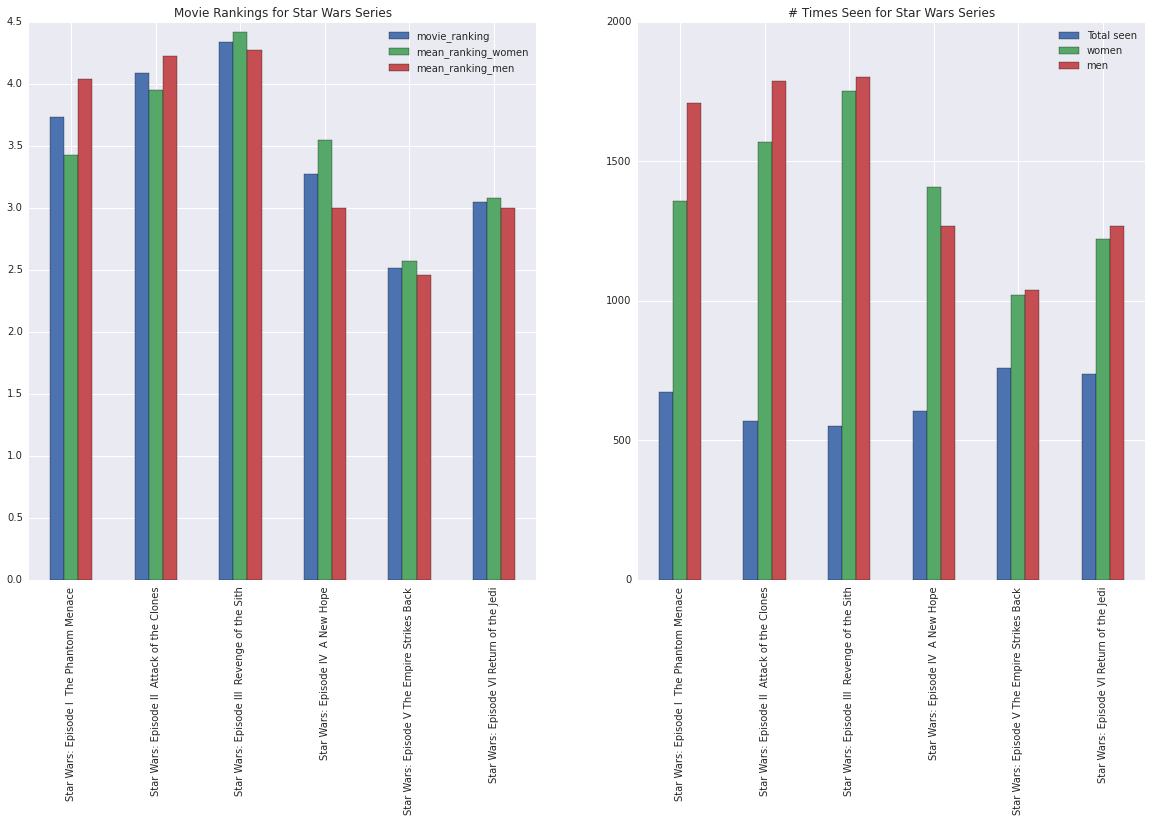

In [27]:
fig = plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

# Binarize movie ranking based on gender
mean_ranking_men=[]
mean_ranking_women=[]
for col in star_wars.columns[9:15]:
    mean_ranking_women.append(star_wars[star_wars["Gender"] == "Female"][col].mean())
    mean_ranking_men.append(star_wars[star_wars["Gender"] == "Male"][col].mean())
    
# cast the mean ranking into a dataframe with the movie names as index
movie_mean['mean_ranking_women'] = mean_ranking_women
movie_mean['mean_ranking_men'] = mean_ranking_men
movie_mean=movie_mean.rename(columns={0:'movie_ranking'})

# plot using pandas plot
movie_mean.plot(kind='bar', legend=True, title='Movie Rankings for Star Wars Series', ax=ax1)

# Binarize movie seen based on gender
count_seen_men=[]
count_seen_women=[]
for col in star_wars.columns[9:15]:
    count_seen_women.append(star_wars[star_wars["Gender"] == "Female"][col].sum())
    count_seen_men.append(star_wars[star_wars["Gender"] == "Male"][col].sum())
    
# cast the mean ranking into a dataframe with the movie names as index
movie_seen['women'] = count_seen_women
movie_seen['men'] = count_seen_men
movie_seen=movie_seen.rename(columns={0:'Total seen'})

# plot using pandas plot
movie_seen.plot(kind='bar', legend=True, title='# Times Seen for Star Wars Series', ax=ax2)
sns.plt.show()

**The above chart indicates that movies that had lower ratings were typically favored more by women, and vice versa**

### Another way to do the same thing

               male    female
ranking_1  4.037825  3.429293
ranking_2  4.224586  3.954660
ranking_3  4.274882  4.418136
ranking_4  2.997636  3.544081
ranking_5  2.458629  2.569270


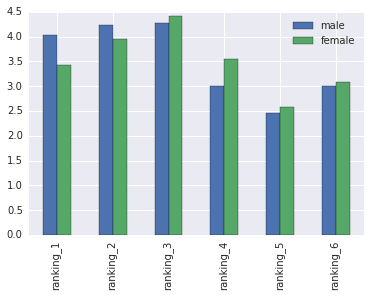

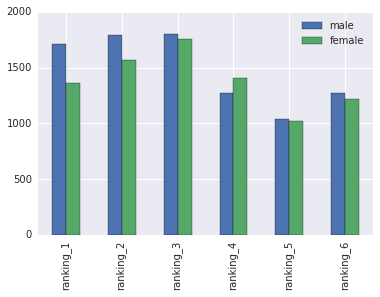

In [42]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

male_ranking=males[males.columns[9:15]].mean()
female_ranking=females[females.columns[9:15]].mean()

mean_ranking = pd.DataFrame(pd.concat([male_ranking,female_ranking],axis=1))
mean_ranking.columns=['male','female']
print(mean_ranking.head(5))

mean_ranking.plot(kind='bar',legend=True)

##############

male_count=males[males.columns[9:15]].sum()
female_count=females[females.columns[9:15]].sum()

mean_count = pd.DataFrame(pd.concat([male_count,female_count],axis=1))
mean_count.columns=['male','female']

mean_count.plot(kind='bar',legend=True)